In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from dataclasses import field, asdict, dataclass
from typing import List

@dataclass
class RequestFuncOutput:
    prompt_text: str = ""
    generated_text: str = ""
    success: bool = False
    request_latency: float = 0
    ttft: float = 0  # Time to first token
    itl: List[float] = field(default_factory=list)  # List of inter-token latencies
    prompt_len: int = 0
    error: str = ""
    global_time: float = 0
    output_len: float = None
    tpot: float = None
    prefill_decode_ratio: float = None
    send_out_time: float = 0.0
    route_dest: int = None

In [10]:
def retrive_request_outputs(path):
    with open(path, 'r') as file:
        data = json.load(file)
        outputs = [RequestFuncOutput(**d) for d in data]
    return outputs

In [11]:
outputs = retrive_request_outputs('/mnt/ssd1/alm-os/sglang_multi_model/logs/sim_hot_cold_rps18_600/detail_stats.json')

In [52]:
def lat_tpot_ttft(outputs):
    lats = [o.request_latency for o in outputs if o.request_latency]
    tpots = [o.tpot for o in outputs if o.tpot]
    ttfts = [o.ttft for o in outputs if o.ttft]
    lat_p50, lat_p90, lat_p99 = np.percentile(lats, [50, 90, 99])
    tpot_p50, tpot_p90, tpot_p99 = np.percentile(tpots, [50, 90, 99])
    ttft_p50, ttft_p90, ttft_p99 = np.percentile(ttfts, [50, 90, 99])
    
    print(f"Num finished: {len([o for o in outputs if o.success])}")
    print(f'Latency: p50={lat_p50:.2f}, p90={lat_p90:.2f}, p99={lat_p99:.2f}')
    print(f'TPOT: p50={tpot_p50:.2f}, p90={tpot_p90:.2f}, p99={tpot_p99:.2f}')
    print(f'TTFT: p50={ttft_p50:.2f}, p90={ttft_p90:.2f}, p99={ttft_p99:.2f}')
    
    fig, axs = plt.subplots(1,3, figsize=(16, 4))
    sns.kdeplot(x=lats,  ax=axs[0], cumulative=True).set_title('Latency')
    sns.kdeplot(x=tpots, ax=axs[1], cumulative=True).set_title('TPOT')
    sns.kdeplot(x=ttfts, ax=axs[2], cumulative=True).set_title('TTFT')

Num finished: 3091
Latency: p50=29.88, p90=54.62, p99=145.01
TPOT: p50=0.36, p90=0.44, p99=0.46
TTFT: p50=10.40, p90=28.94, p99=123.97


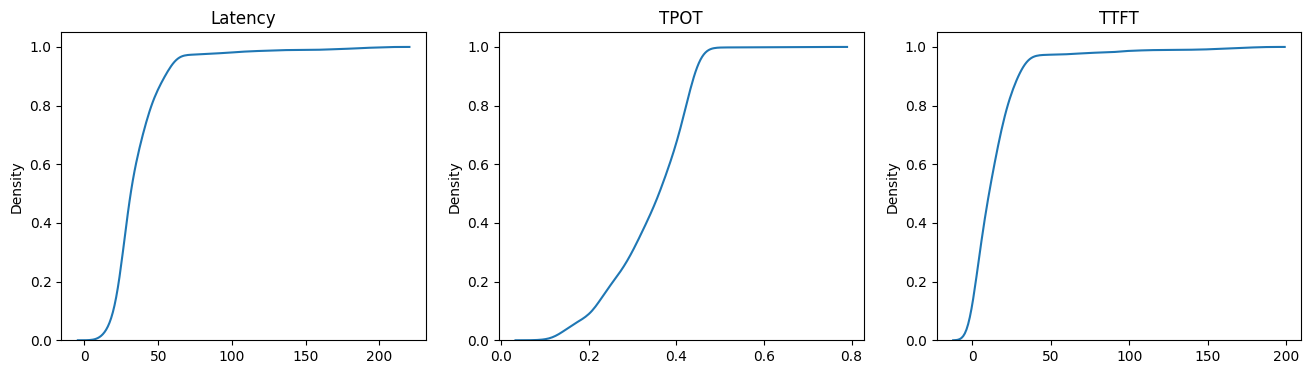

In [53]:
lat_tpot_ttft([o for o in outputs if o.prompt_text.startswith('Workload ') and o.success])

Num finished: 5400
Latency: p50=29.33, p90=37.35, p99=93.58
TPOT: p50=0.42, p90=0.47, p99=0.50
TTFT: p50=2.43, p90=10.40, p99=67.40


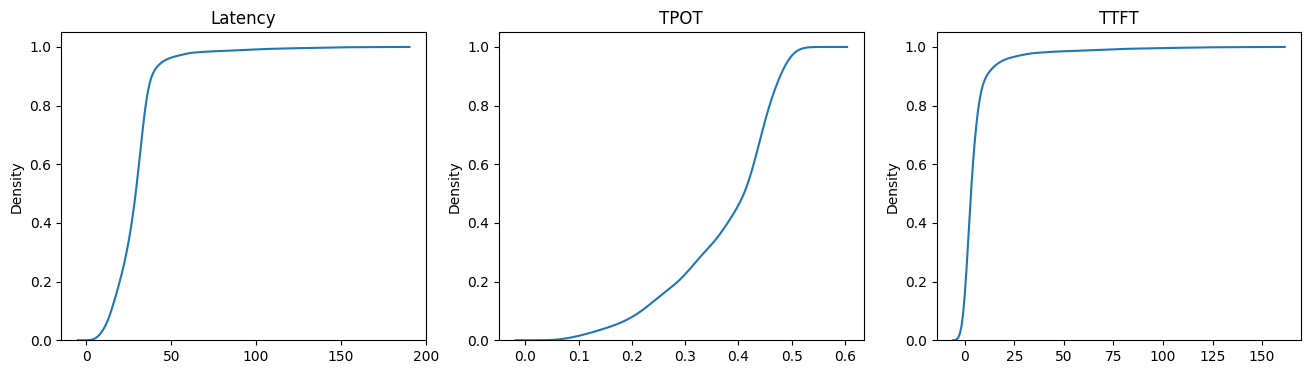

In [54]:
lat_tpot_ttft([o for o in outputs if not o.prompt_text.startswith('Workload ') and o.success])

Num finished: 8491
Latency: p50=29.48, p90=45.29, p99=105.55
TPOT: p50=0.39, p90=0.47, p99=0.50
TTFT: p50=4.20, p90=22.16, p99=88.62


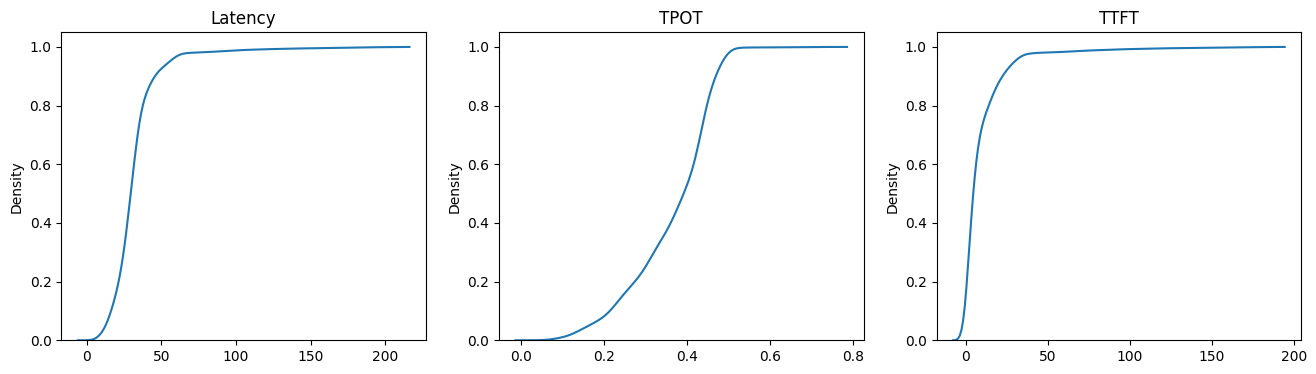

In [55]:
lat_tpot_ttft(outputs)

In [56]:
oracle_outputs = retrive_request_outputs('/mnt/ssd1/alm-os/sglang_multi_model/logs/sim_hot_cold_rps18_600/details-DataParallelRuntimeSelectionPolicy.CUSTOM-CustomPolicyType.ORACLE-4r.json')


Num finished: 9253
Latency: p50=26.22, p90=39.58, p99=173.64
TPOT: p50=0.26, p90=0.42, p99=0.46
TTFT: p50=6.89, p90=18.46, p99=155.83


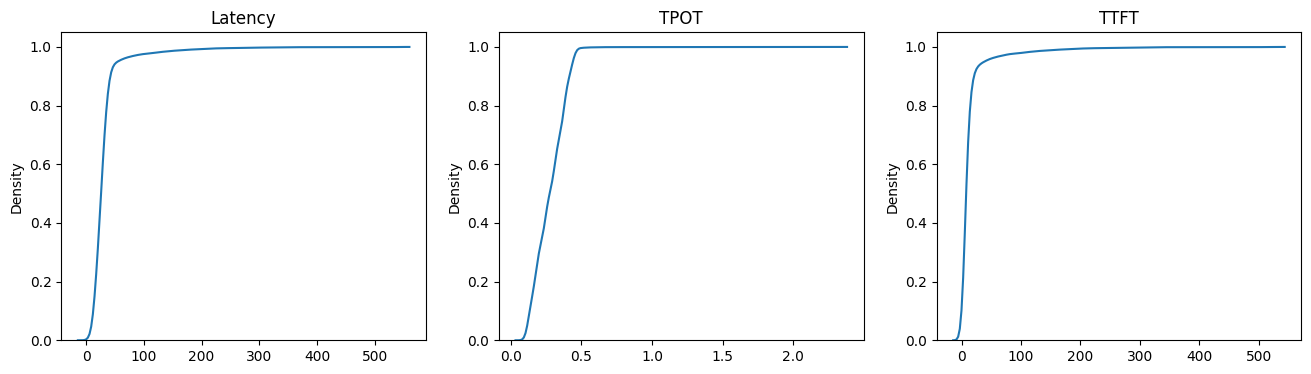

In [57]:
lat_tpot_ttft(oracle_outputs)

In [58]:
random_outputs = retrive_request_outputs('/mnt/ssd1/alm-os/sglang_multi_model/logs/sim_hot_cold_rps18_600/details-DataParallelRuntimeSelectionPolicy.RANDOM-None-4r.json')

Num finished: 7971
Latency: p50=28.63, p90=51.60, p99=185.32
TPOT: p50=0.27, p90=0.41, p99=0.47
TTFT: p50=7.48, p90=35.06, p99=168.23


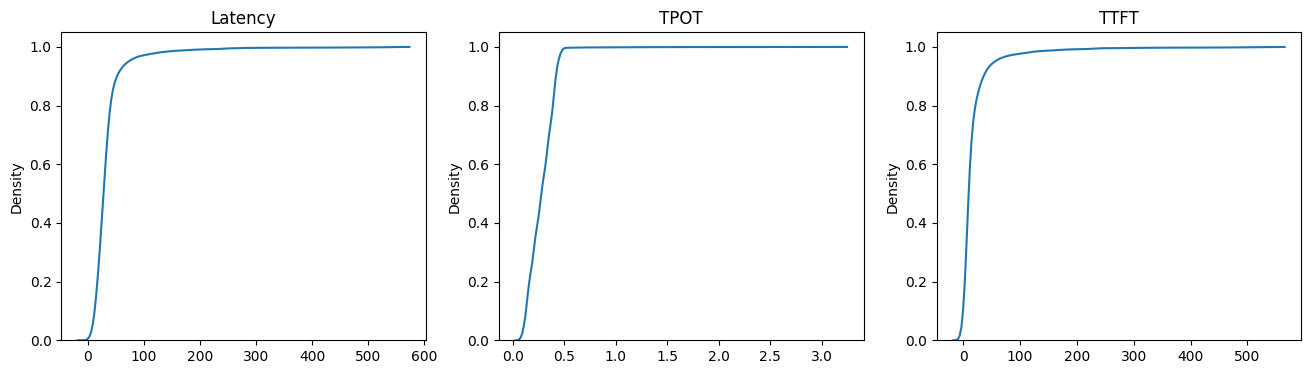

In [59]:
lat_tpot_ttft(random_outputs)

In [61]:
hc_2h_2c = retrive_request_outputs('/mnt/ssd1/alm-os/sglang_multi_model/logs/sim_hot_cold_rps18_600/details-DataParallelRuntimeSelectionPolicy.CUSTOM-CustomPolicyType.ORACLE_HOT_COLD-4r_2h_2c.json')

Num finished: 9008
Latency: p50=6.52, p90=37.66, p99=181.70
TPOT: p50=0.09, p90=0.37, p99=0.48
TTFT: p50=0.59, p90=14.57, p99=165.98


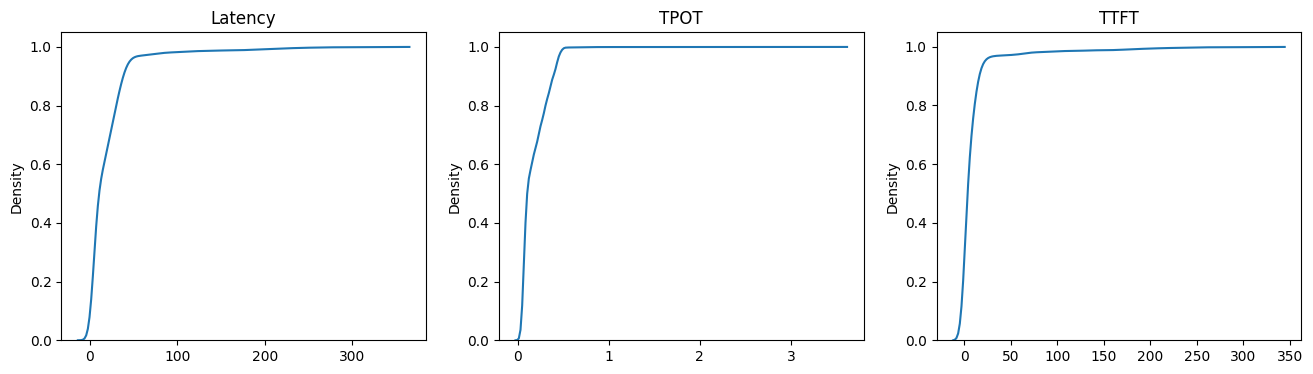

In [62]:
lat_tpot_ttft(hc_2h_2c)

Num finished: 5320
Latency: p50=4.64, p90=12.66, p99=30.03
TPOT: p50=0.07, p90=0.17, p99=0.39
TTFT: p50=0.24, p90=0.90, p99=9.19


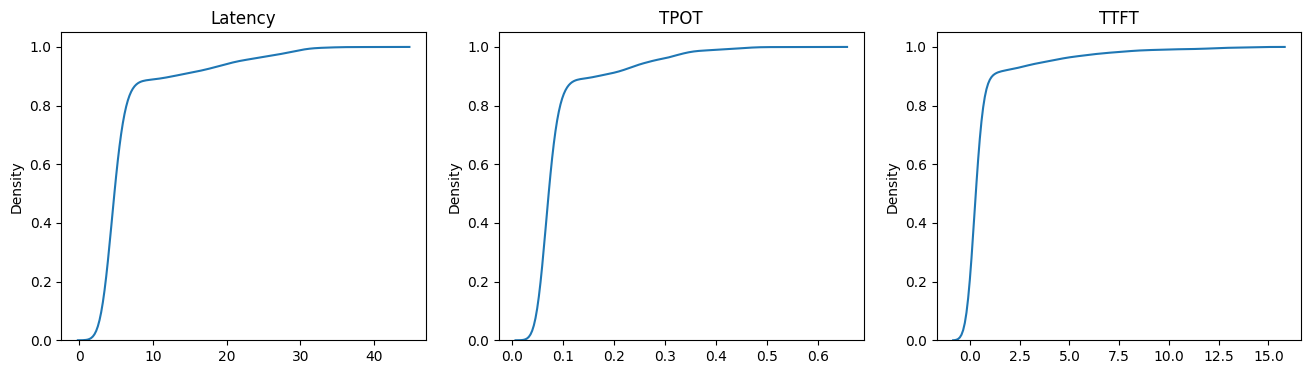

In [63]:
lat_tpot_ttft([o for o in hc_2h_2c if o.prompt_text.startswith('Workload ') and o.success])

Num finished: 3688
Latency: p50=29.62, p90=46.33, p99=229.97
TPOT: p50=0.29, p90=0.43, p99=0.49
TTFT: p50=9.92, p90=22.43, p99=212.67


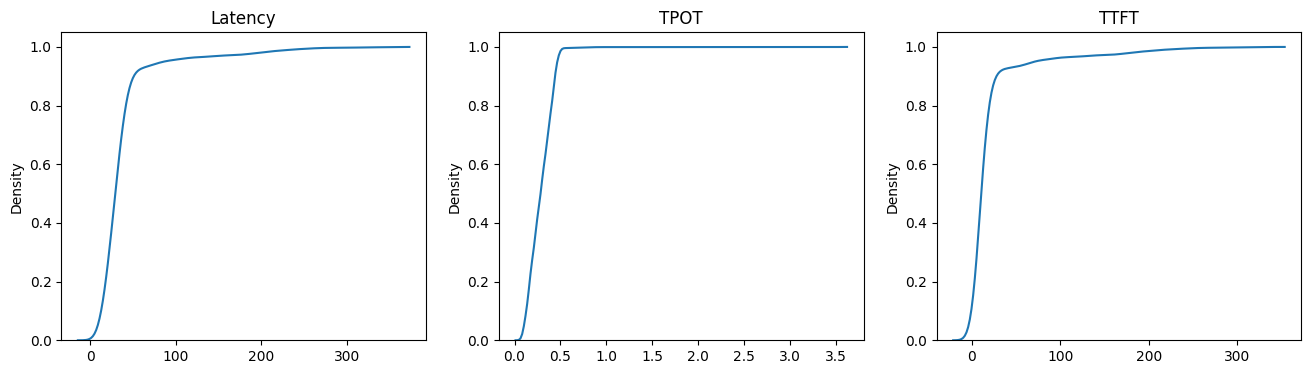

In [64]:
lat_tpot_ttft([o for o in hc_2h_2c if not o.prompt_text.startswith('Workload ') and o.success])